## Human Failure Representation

This paper covers the exploration and analysis of error producing conditions by a human operator in the rover model.

In [1]:
from rover_model_human import Rover, gen_params
from rover_model import plot_map, plot_trajectories
import fmdtools.resultdisp as rd
import fmdtools.faultsim.propagate as prop
from fmdtools.modeldef import SampleApproach, NominalApproach

import numpy as np
import matplotlib.pyplot as plt

Visualizing Rover Structure

In [2]:
mdl = Rover()

In [3]:
#%matplotlib qt
#rd.graph.set_pos(mdl, gtype='bipartite')

In [4]:
#%matplotlib inline

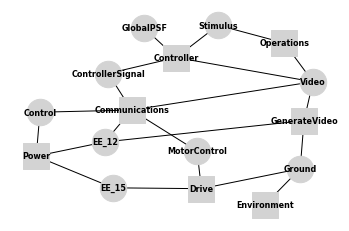

In [5]:
mdl = Rover()
fig, ax = rd.graph.show(mdl, gtype='bipartite')

In [6]:
fig.savefig("rover_structure.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

Visualizing Action Sequence Graph for the Controller

In [7]:
mdl.fxns['Controller'].action_graph

In [8]:
#%matplotlib qt
#rd.graph.set_pos(mdl.fxns['Controller'].flow_graph)

In [10]:
#%matplotlib inline

In [11]:
act_pos={'Press': [0.942, 0.076], 'ComprehendOut': [0.302, 0.452], 'SeeOut': [0.028, 0.732], 
             'Project': [0.499, 0.46], 'PressOut': [0.958, -0.07], 'Reach': [0.797, 0.175], 
             'ProjectOut': [0.482, 0.302], 'ReachOut': [0.806, 0.041], 'Comprehend': [0.317, 0.595], 
             'Look': [0.038, 0.877], 'Decide': [0.667, 0.308], 'DecideOut': [0.652, 0.189], 
             'Signal': [0.721, 0.736], 'Percieve': [0.165, 0.738], 'PercieveOut': [0.102, 0.594], 
             'Video': [0.418, 0.889], 'Stimulus': [0.026, 1.034], 'LocalPSF': [0.717, 0.484], 
             'GlobalPSF': [0.521, 0.836]}

In [12]:
%matplotlib qt
rd.graph.set_pos(mdl.fxns['Controller'].flow_graph, initpos=act_pos)

{'Press': [0.942, 0.076],
 'ComprehendOut': [0.302, 0.452],
 'SeeOut': [0.028, 0.732],
 'Project': [0.499, 0.46],
 'PressOut': [0.958, -0.07],
 'Reach': [0.797, 0.175],
 'ProjectOut': [0.482, 0.302],
 'ReachOut': [0.806, 0.041],
 'Comprehend': [0.317, 0.595],
 'Look': [0.038, 0.877],
 'Decide': [0.667, 0.308],
 'DecideOut': [0.652, 0.189],
 'Signal': [0.721, 0.736],
 'Percieve': [0.165, 0.738],
 'PercieveOut': [0.102, 0.594],
 'Video': [0.418, 0.889],
 'Stimulus': [0.026, 1.034],
 'LocalPSF': [0.717, 0.484],
 'GlobalPSF': [0.521, 0.836]}

In [13]:
%matplotlib inline

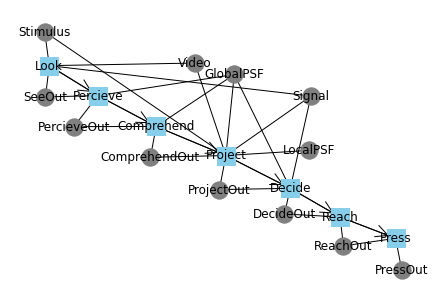

In [14]:
fig = mdl.fxns['Controller'].show_ASG(pos=act_pos, with_cond_labels=False)

In [20]:
fig.savefig("action_graph.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

## Testing behavioral simulation

In [12]:
mdl = Rover()

Execution order

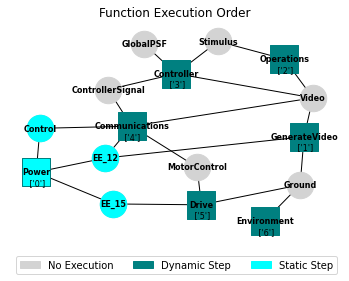

In [13]:
order_fig = rd.graph.exec_order(mdl, gtype='bipartite')

Performance on turn

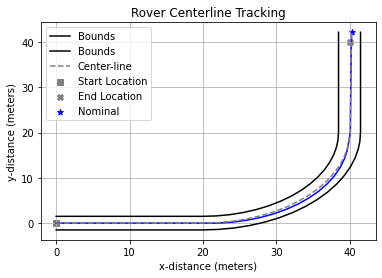

In [14]:
mdl = Rover(params=gen_params('turn'))
endresults, resgraph, mdlhist = prop.nominal(mdl)
plot_map(mdl, mdlhist)

Performance on sine map

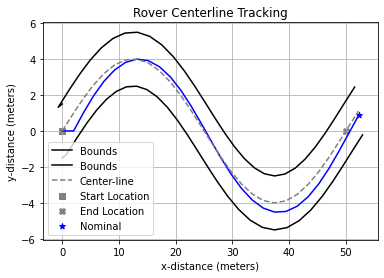

In [15]:
mdl = Rover(params=gen_params('sine', amp=4))
endresults, resgraph, mdlhist = prop.nominal(mdl)
plot_map(mdl, mdlhist)

In [16]:
phases, modephases = rd.process.modephases(mdlhist)

C:\Users\dhulse\Documents\GitHub\fmdtools\rad_models\rover\..\..\fmdtools\resultdisp\plot.py:632: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout(pad=1)


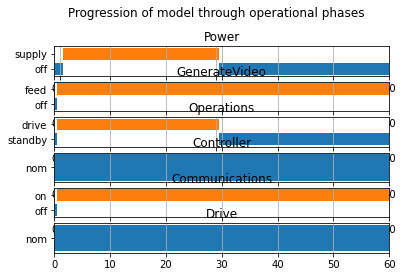

In [17]:
phase_fig = rd.plot.phases(phases, modephases=modephases)

## Testing Faults

In [18]:
app=SampleApproach(mdl, faults='Controller', phases={'drive':phases['Operations']['drive']})

In [19]:
app.rates

{('Controller', 'stuck_turn'): {('global', 'drive'): 14.0},
 ('Controller', 'stuck_power'): {('global', 'drive'): 14.0},
 ('Controller', 'failed_look'): {('global', 'drive'): 28.0},
 ('Controller', 'perc_failed_noaction'): {('global', 'drive'): 7.0},
 ('Controller', 'perc_failed_S1'): {('global', 'drive'): 7.0},
 ('Controller', 'perc_failed_S2'): {('global', 'drive'): 7.0},
 ('Controller', 'perc_failed_Video'): {('global', 'drive'): 7.0},
 ('Controller', 'comp_failed_noaction'): {('global', 'drive'): 7.0},
 ('Controller', 'comp_failed_S1'): {('global', 'drive'): 7.0},
 ('Controller', 'comp_failed_S2'): {('global', 'drive'): 7.0},
 ('Controller', 'comp_failed_Video'): {('global', 'drive'): 7.0},
 ('Controller', 'proj_failed_nopower'): {('global', 'drive'): 4.0},
 ('Controller', 'proj_failed_turn_left'): {('global', 'drive'): 4.0},
 ('Controller', 'proj_failed_noaction'): {('global', 'drive'): 4.0},
 ('Controller', 'proj_failed_poweron'): {('global', 'drive'): 4.0},
 ('Controller', 'proj

In [20]:
app.times

[15]

In [21]:
endclasses,mdlhists = prop.approach(mdl, app)

SCENARIOS COMPLETE:  34%|███▍      | 10/29 [00:00<00:00, 47.22it/s]C:\Users\dhulse\Documents\GitHub\fmdtools\rad_models\rover\rover_model_human.py:390: UserWarning: The Signal requires no power on/off actions. Fault mode `failed_nopower' removed.
  self.remove_fault('failed_nopower', opermode='nominal', warnmessage='The Signal requires no power on/off actions.')
C:\Users\dhulse\Documents\GitHub\fmdtools\rad_models\rover\rover_model_human.py:369: UserWarning: The Signal requires a left turn. Fault mode `failed_turn_left' removed.
  self.remove_fault('failed_turn_left', opermode='nominal', warnmessage='The Signal requires a left turn.')
SCENARIOS COMPLETE:  52%|█████▏    | 15/29 [00:00<00:00, 45.75it/s]C:\Users\dhulse\Documents\GitHub\fmdtools\rad_models\rover\rover_model_human.py:377: UserWarning: The Signal requires no turns. Fault mode `failed_noturn' removed.
  self.remove_fault('failed_noturn', opermode='nominal', warnmessage= 'The Signal requires no turns.')
C:\Users\dhulse\Documen

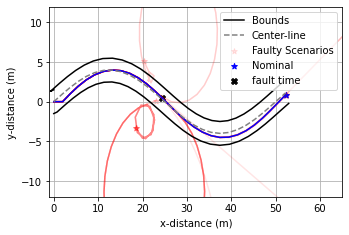

In [22]:
fig = plt.figure(figsize=(5.25,3.5))
fig = plot_trajectories(mdlhists, app=app, faultlabel='Faulty Scenarios', title='', mode_trunc=len('Controller'), mode_trunc_end=4, show_labels=False, xlim=(-1,65), ylim=(-12,12))

In [23]:
fig.savefig("rover_map.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

Below shows the impact of each fault:

In [24]:
reshists, diffs, summaries = rd.process.hists(mdlhists)
new_fault_tab = rd.tabulate.fullfmea(endclasses, summaries)
new_fault_tab = new_fault_tab.sort_values('end_dist', ascending=False)

new_fault_tab 

,degraded functions,degraded flows,rate,cost,prob,expected cost,at_finish,line_dist,num_modes,end_dist,faults,classification,x,y
"Controller press_failed_noaction, t=15","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",0,0,1,0,False,66.521907,1,67.683625,{'Controller': ['press_failed_noaction']},incomplete mission faulty,105.502292,-38.737174
"Controller stuck_turn, t=15","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",0,0,1,0,False,52.642596,1,63.855289,{'Controller': ['stuck_turn']},incomplete mission faulty,13.464261,-52.370198
"Controller proj_failed_poweron, t=15","[Power, Controller]","[Ground, EE_15, Video, Control, ControllerSignal]",0,0,1,0,False,59.876171,1,62.366076,"{'Controller': ['decide_failed_poweron', 'proj...",incomplete mission faulty,104.258661,30.749392
"Controller decide_failed_poweron, t=15","[Power, Controller]","[Ground, EE_15, Video, Control, ControllerSignal]",0,0,1,0,False,59.876171,1,62.366076,{'Controller': ['decide_failed_poweron']},incomplete mission faulty,104.258661,30.749392
"Controller stuck_power, t=15","[Power, Controller]","[Ground, EE_15, Video, Control, ControllerSignal]",0,0,1,0,False,59.876171,1,62.366076,{'Controller': ['stuck_power']},incomplete mission faulty,104.258661,30.749392
"Controller failed_look, t=15","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",0,0,1,0,False,5.819895,1,31.69793,{'Controller': ['failed_look']},incomplete mission faulty,18.476426,-3.320098
"Controller perc_failed_noaction, t=15","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",0,0,1,0,False,5.819895,1,31.69793,{'Controller': ['perc_failed_noaction']},incomplete mission faulty,18.476426,-3.320098
"Controller cannot_reach, t=15","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",0,0,1,0,False,5.819895,1,31.69793,{'Controller': ['cannot_reach']},incomplete mission faulty,18.476426,-3.320098
"Controller comp_failed_noaction, t=15","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",0,0,1,0,False,5.819895,1,31.69793,{'Controller': ['comp_failed_noaction']},incomplete mission faulty,18.476426,-3.320098
"Controller decide_failed_noaction, t=15","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",0,0,1,0,False,5.819895,1,31.69793,{'Controller': ['decide_failed_noaction']},incomplete mission faulty,18.476426,-3.320098


In [50]:
fault_tab = new_fault_tab[['degraded functions','degraded flows', 'classification', 'end_dist']]
fault_tab

,degraded functions,degraded flows,classification,end_dist
"Controller press_failed_noaction, t=15","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,67.683625
"Controller stuck_turn, t=15","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,63.855289
"Controller proj_failed_poweron, t=15","[Power, Controller]","[Ground, EE_15, Video, Control, ControllerSignal]",incomplete mission faulty,62.366076
"Controller decide_failed_poweron, t=15","[Power, Controller]","[Ground, EE_15, Video, Control, ControllerSignal]",incomplete mission faulty,62.366076
"Controller stuck_power, t=15","[Power, Controller]","[Ground, EE_15, Video, Control, ControllerSignal]",incomplete mission faulty,62.366076
"Controller failed_look, t=15","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,31.69793
"Controller perc_failed_noaction, t=15","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,31.69793
"Controller cannot_reach, t=15","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,31.69793
"Controller comp_failed_noaction, t=15","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,31.69793
"Controller decide_failed_noaction, t=15","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,31.69793


In [51]:
fault_tab

,degraded functions,degraded flows,classification,end_dist
"Controller press_failed_noaction, t=15","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,67.683625
"Controller stuck_turn, t=15","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,63.855289
"Controller proj_failed_poweron, t=15","[Power, Controller]","[Ground, EE_15, Video, Control, ControllerSignal]",incomplete mission faulty,62.366076
"Controller decide_failed_poweron, t=15","[Power, Controller]","[Ground, EE_15, Video, Control, ControllerSignal]",incomplete mission faulty,62.366076
"Controller stuck_power, t=15","[Power, Controller]","[Ground, EE_15, Video, Control, ControllerSignal]",incomplete mission faulty,62.366076
"Controller failed_look, t=15","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,31.69793
"Controller perc_failed_noaction, t=15","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,31.69793
"Controller cannot_reach, t=15","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,31.69793
"Controller comp_failed_noaction, t=15","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,31.69793
"Controller decide_failed_noaction, t=15","[Power, Operations, Controller]","[Ground, EE_15, Video, MotorControl, Control, ...",incomplete mission faulty,31.69793


In [52]:
fault_tab = fault_tab[:15]

In [53]:
print(fault_tab.to_latex())

\begin{tabular}{lllll}
\toprule
{} &               degraded functions &                                     degraded flows &             classification &   end\_dist \\
\midrule
Controller press\_failed\_noaction, t=15    &  [Power, Operations, Controller] &  [Ground, EE\_15, Video, MotorControl, Control, ... &  incomplete mission faulty &  67.683625 \\
Controller stuck\_turn, t=15               &  [Power, Operations, Controller] &  [Ground, EE\_15, Video, MotorControl, Control, ... &  incomplete mission faulty &  63.855289 \\
Controller proj\_failed\_poweron, t=15      &              [Power, Controller] &  [Ground, EE\_15, Video, Control, ControllerSignal] &  incomplete mission faulty &  62.366076 \\
Controller decide\_failed\_poweron, t=15    &              [Power, Controller] &  [Ground, EE\_15, Video, Control, ControllerSignal] &  incomplete mission faulty &  62.366076 \\
Controller stuck\_power, t=15              &              [Power, Controller] &  [Ground, EE\_15, Video, Contro

As shown, most modes now have an effect.

## Examining Performance Shaping Factors

In [29]:
nomapp = NominalApproach()
nomapp.add_param_ranges(gen_params,'PSFs', 'sine', fatigue=(0,11,1),attention=(0,11,1), amp=4)

In [30]:
endresults, mdlhists = prop.nominal_approach(mdl, nomapp)

SCENARIOS COMPLETE: 100%|██████████| 121/121 [00:02<00:00, 52.52it/s]


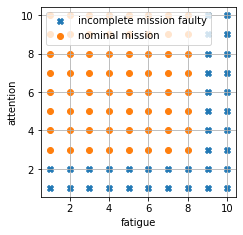

In [31]:

fig = rd.plot.nominal_vals_2d(nomapp, endresults, 'fatigue', 'attention', title="", legendloc="upper left", figsize=(3.5,3.5))

In [32]:
fig.savefig("nominal_psfs.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [33]:
mdl = Rover(params=gen_params('sine', amp=4, fatigue=0))
endresults, resgraph, mdlhist = prop.one_fault(mdl, 'Operations', 'no_con', time=15)

In [34]:
endresults['faults']

{'Operations': ['no_con']}

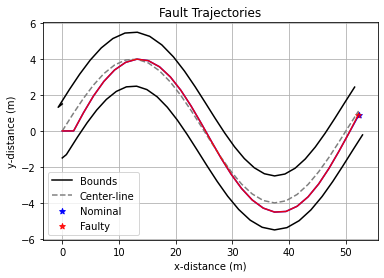

In [35]:
traj_fig = plot_trajectories(mdlhist, faultalpha=0.9)

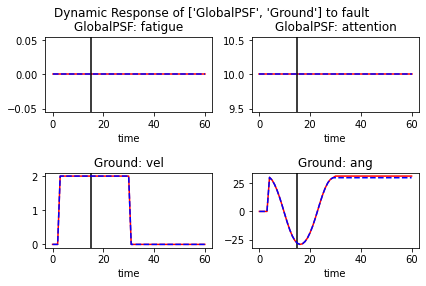

In [36]:
fig = rd.plot.mdlhistvals(mdlhist, time=15, fxnflowvals={'GlobalPSF':['fatigue','attention'], 'Ground':['ang', 'vel']}, legend=False)

In [37]:
mdlhist['nominal'].keys()

dict_keys(['flows', 'functions', 'time'])

In [48]:
faulthists = {}
faulttimes = [j for j in range(0,30,5)]
for j in faulttimes:
    for i in range(10):
        np.random.seed()
        mdl = Rover(params=gen_params('turn', amp=4, fatigue=0))
        endresults, resgraph, mdlhist = prop.one_fault(mdl, 'Operations', 'no_con', time=j)
        faulthists[str(i+j)] = mdlhist['faulty']

C:\Users\dhulse\Documents\GitHub\fmdtools\rad_models\rover\..\..\fmdtools\modeldef.py:655: UserWarning: The screen is already not visible to the operator. All faults removed.
  if warnmessage: self.warn(warnmessage, "All faults removed.")


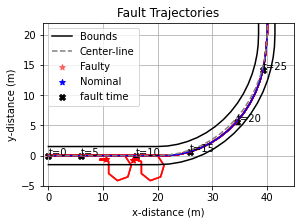

In [49]:
fig = plt.figure(figsize=(4.5,3))
fig = plot_trajectories(faulthists,mdlhist['nominal'], faultalpha=0.5, show_labels=False, xlim=(-1,45), ylim=(-5,22))
for t in faulttimes:
    plt.annotate("t="+str(t), (mdlhist['nominal']['flows']['Ground']['x'][t], mdlhist['nominal']['flows']['Ground']['y'][t]))
plt.scatter(mdlhist['nominal']['flows']['Ground']['x'][faulttimes], mdlhist['nominal']['flows']['Ground']['y'][faulttimes], marker='X', color='black', label='fault time')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

In [40]:
fig.savefig("nocon_trajectories.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [41]:
plothists = faulthists
plothists['nominal'] = mdlhist['nominal']

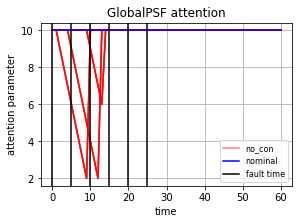

In [42]:
fig, ax = rd.plot.mdlhists(plothists, comp_groups={'no_con':faulthists.keys(),'nominal':['nominal']}, fxnflowvals={'GlobalPSF':['attention']}, cols=1, time_slice=faulttimes, indiv_kwargs={'no_con':{'alpha':0.5, 'color':'red'}, 'nominal':{'color':'blue'}}, time_slice_label='fault time', figsize=(4.5,3),  ylabels={('GlobalPSF','attention'):'attention parameter'})

In [43]:
fig.savefig("nocon_attention.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [44]:
faulthists = {}
faulttimes = [j for j in range(0,30,5)]
for j in faulttimes:
    for i in range(10):
        np.random.seed()
        mdl = Rover(params=gen_params('sine', amp=4, fatigue=0))
        endresults, resgraph, mdlhist = prop.one_fault(mdl, 'Operations', 'no_con', time=j)
        faulthists[str(i+j)] = mdlhist['faulty']

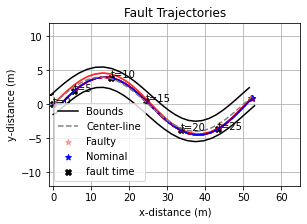

In [46]:
fig = plt.figure(figsize=(4.5,3))
fig = plot_trajectories(faulthists,mdlhist['nominal'], faultalpha=0.3, show_labels=False, xlim=(-1,65), ylim=(-12,12))
for t in faulttimes:
    plt.annotate("t="+str(t), (mdlhist['nominal']['flows']['Ground']['x'][t], mdlhist['nominal']['flows']['Ground']['y'][t]))
plt.scatter(mdlhist['nominal']['flows']['Ground']['x'][faulttimes], mdlhist['nominal']['flows']['Ground']['y'][faulttimes], marker='X', color='black', label='fault time')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

In [ ]:
fig.savefig("nocon_trajectories_sine.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [ ]:
plothists = faulthists
plothists['nominal'] = mdlhist['nominal']

In [ ]:
fig, ax = rd.plot.mdlhists(plothists, comp_groups={'no_con':faulthists.keys(),'nominal':['nominal']}, fxnflowvals={'GlobalPSF':['attention']}, cols=1, time_slice=faulttimes, indiv_kwargs={'no_con':{'alpha':0.5, 'color':'red'}, 'nominal':{'color':'blue'}}, time_slice_label='fault time', figsize=(4.5,3), ylabels={('GlobalPSF','attention'):'attention parameter'})

In [ ]:
fig.savefig("nocon_attention_sine.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)